- Name: Eben Gunadi
- Github Username: egunadi
- USC ID: 3976793880

<center><h1>Gunadi_Eben_HW1</h1></center>
<br>
<center><font size="4">Vertebral Column Data</font></center>

### (a) Download Data

Package imports

In [7]:
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

Get the Vertebral Column Data Set

In [8]:
vertebral_filepath = '../data/vertebral_column_data/column_2C_weka.arff'
vertebral_data = arff.loadarff(vertebral_filepath)
vertebral_df = pd.DataFrame(vertebral_data[0])
vertebral_df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,b'Abnormal'
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,b'Abnormal'
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,b'Abnormal'
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,b'Abnormal'
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,b'Abnormal'


In [9]:
vertebral_df.shape

(310, 7)

In [10]:
vertebral_df['class'].unique()

array([b'Abnormal', b'Normal'], dtype=object)

In [11]:
vertebral_df['class'] = vertebral_df['class'].replace(b'Abnormal', True) # AB=1
vertebral_df['class'] = vertebral_df['class'].replace(b'Normal', False) # NO=0  
vertebral_df['class'].unique()

array([ True, False])

### (b) Pre-Processing and Exploratory Data Analysis

#### i. Scatterplots

/Users/ebengunadi/anaconda3/envs/dsci552-hw1/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ebengunadi/anaconda3/envs/dsci552-hw1/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ebengunadi/anaconda3/envs/dsci552-hw1/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ebengunadi/anaconda3/envs/dsci552-hw1/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning

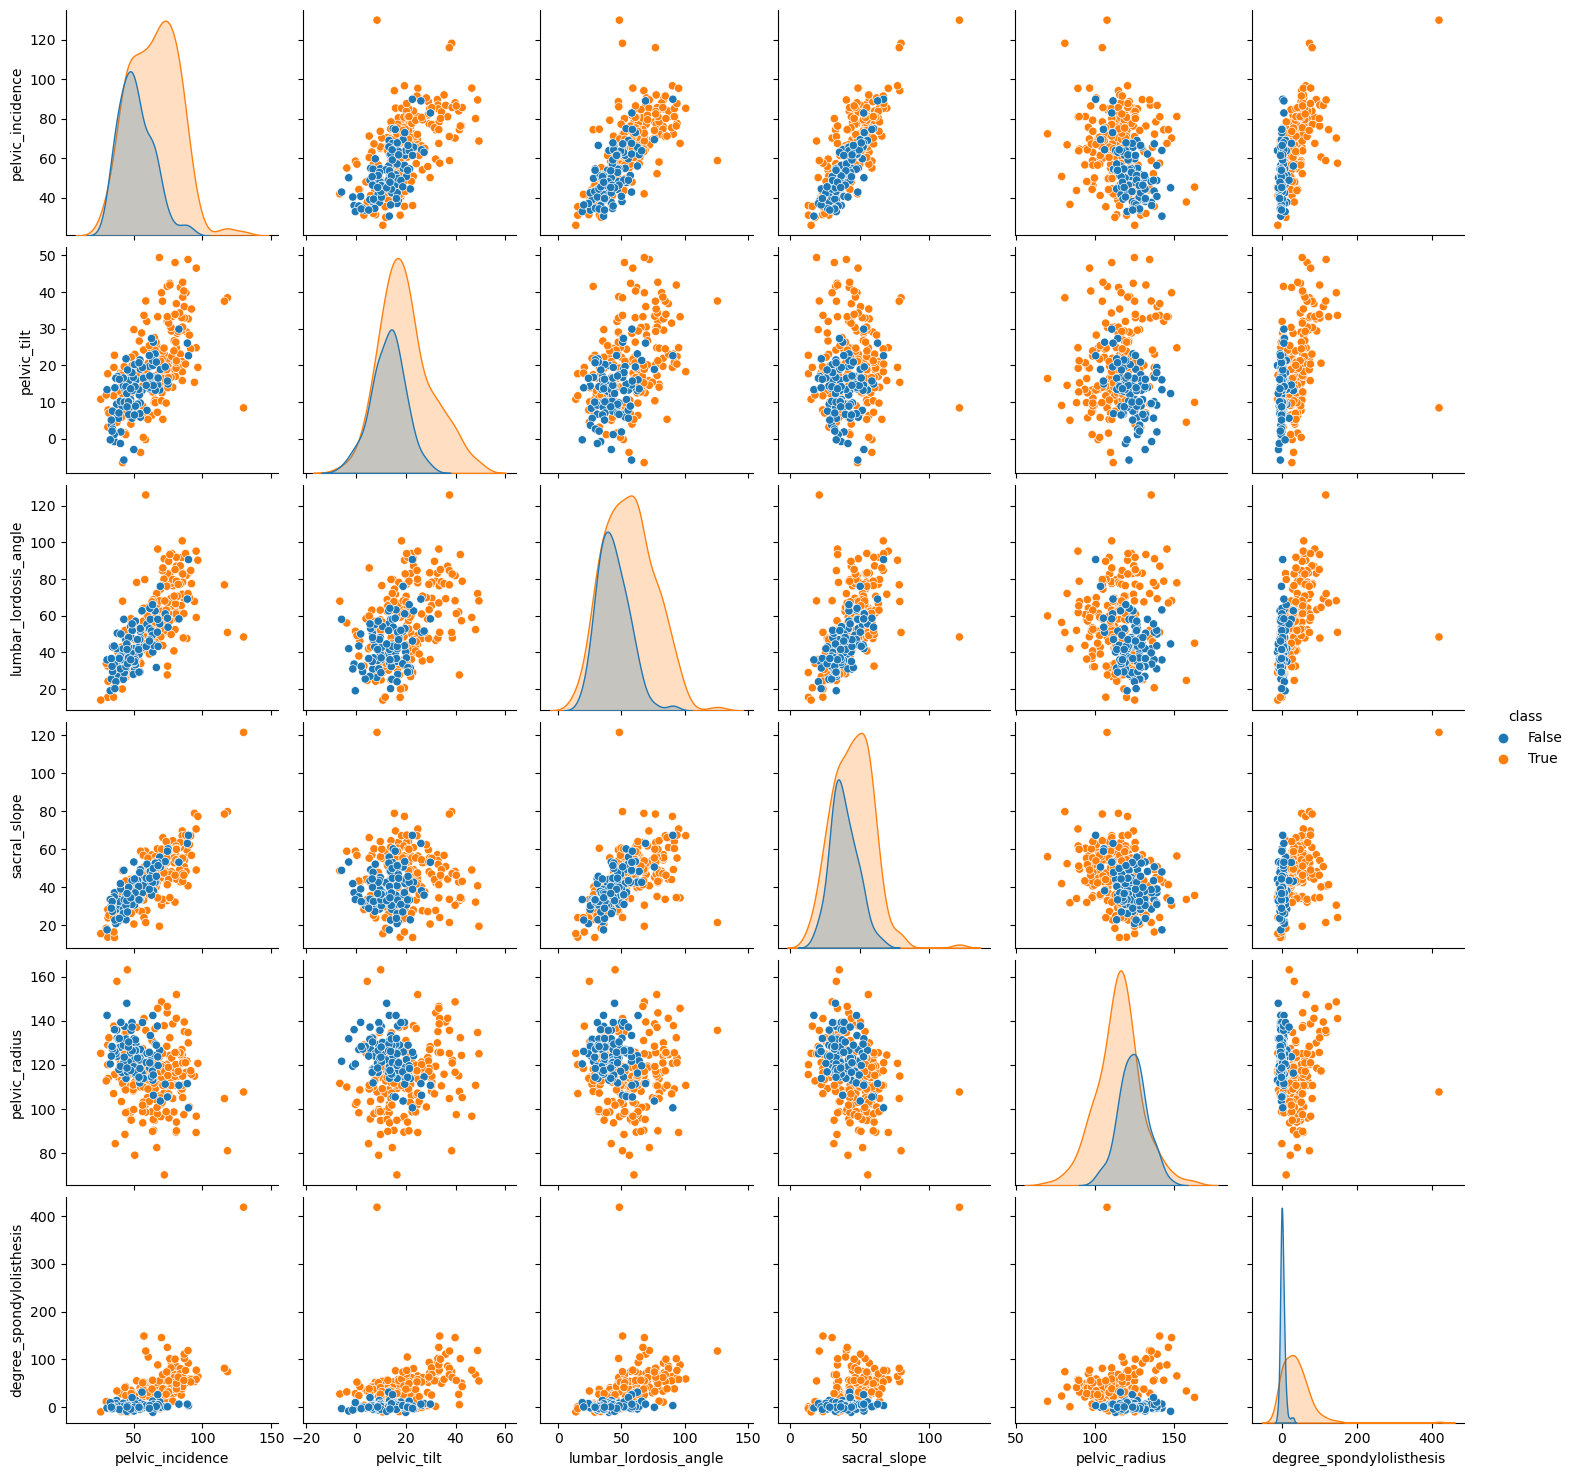

In [12]:
sns.pairplot(vertebral_df, hue='class')

#### ii. Boxplots

<Axes: xlabel='class', ylabel='pelvic_incidence'>

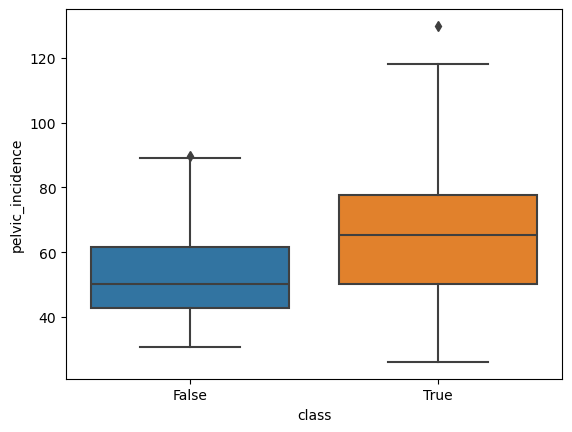

In [13]:
sns.boxplot(x='class', y='pelvic_incidence', data=vertebral_df)

<Axes: xlabel='class', ylabel='pelvic_tilt'>

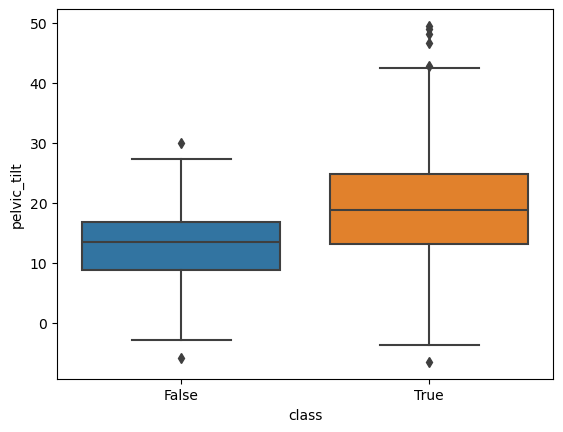

In [14]:
sns.boxplot(x='class', y='pelvic_tilt', data=vertebral_df)

<Axes: xlabel='class', ylabel='lumbar_lordosis_angle'>

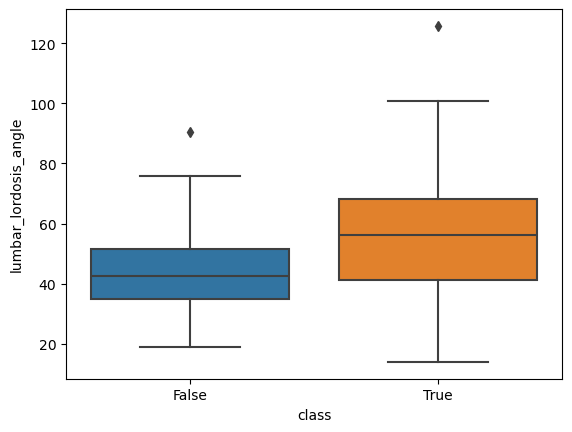

In [15]:
sns.boxplot(x='class', y='lumbar_lordosis_angle', data=vertebral_df)

<Axes: xlabel='class', ylabel='sacral_slope'>

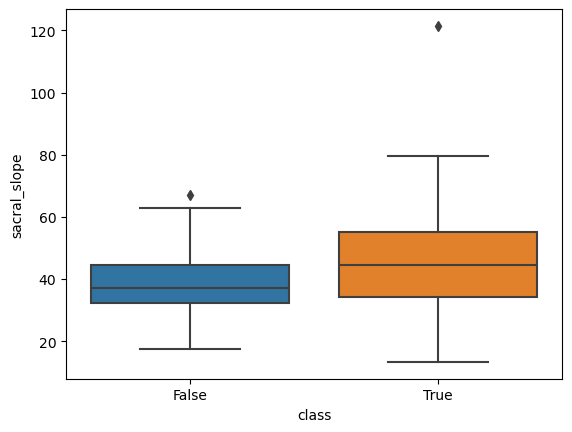

In [16]:
sns.boxplot(x='class', y='sacral_slope', data=vertebral_df)

<Axes: xlabel='class', ylabel='pelvic_radius'>

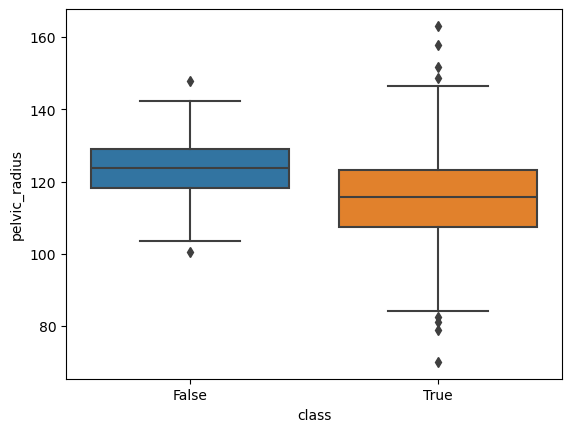

In [17]:
sns.boxplot(x='class', y='pelvic_radius', data=vertebral_df)

<Axes: xlabel='class', ylabel='degree_spondylolisthesis'>

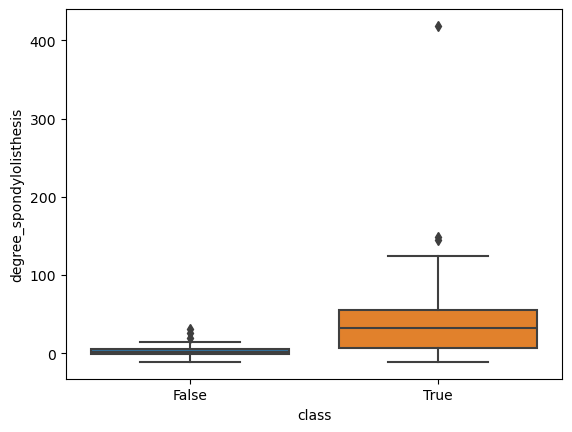

In [18]:
sns.boxplot(x='class', y='degree_spondylolisthesis', data=vertebral_df)

#### iii. Split Data Set

In [19]:
class0_df = vertebral_df[vertebral_df['class'] == False]
class1_df = vertebral_df[vertebral_df['class'] == True]

# Select the first 70 rows of Class 0 as the training set 
class0_train_df = class0_df.iloc[:70, :]

# Select the first 140 rows of Class 1 as the training set 
class1_train_df = class1_df.iloc[:140, :]

# Form the training set by combining the training sets of both classes
vertebral_train_df = pd.concat([class0_train_df, class1_train_df])

# Select the rest of the data as the test set
class0_test_df = class0_df.iloc[70:, :]
class1_test_df = class1_df.iloc[140:, :]
vertebral_test_df = pd.concat([class0_test_df, class1_test_df])

# Verify shapes of training and test sets
print(vertebral_train_df.shape)
print(vertebral_test_df.shape)


(210, 7)
(100, 7)


### (c) Classification

#### i. Euclidean Metric

In [20]:
# Prepare training and test data
train_X = vertebral_train_df.iloc[:, :-1]
train_y = vertebral_train_df.iloc[:, -1]
test_X = vertebral_test_df.iloc[:, :-1]
test_y = vertebral_test_df.iloc[:, -1]

print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

# Select a KNN classifier model that supports Euclidean metric 
from sklearn.neighbors import KNeighborsClassifier

(210, 6)
(210,)
(100, 6)
(100,)


#### ii. Test Data

In [21]:
# k ∈ {208, 205, . . . , 7, 4, 1, }
euclidean_k_values = list(range(208, 0, -3))

# Test all the data in the test database with k nearest neighbors
euclidean_train_errors = []
euclidean_test_errors = []

for k in euclidean_k_values:
    # Create a KNN classifier with k neighbors and Euclidean metric
    knn_classifier_model = KNeighborsClassifier(n_neighbors=k, metric='euclidean')

    # Fit the classifier to the training data
    knn_classifier_model.fit(train_X, train_y)

    # Predict the class labels for the training and test data
    train_class_predictions = knn_classifier_model.predict(train_X)
    test_class_predictions = knn_classifier_model.predict(test_X)

    # Calculate the accuracy of the classifier on the training and test data
    train_accuracy = accuracy_score(train_y, train_class_predictions)
    test_accuracy = accuracy_score(test_y, test_class_predictions)

    # Append the train and test errors to the respective lists
    euclidean_train_errors.append(1 - train_accuracy)
    euclidean_test_errors.append(1 - test_accuracy)

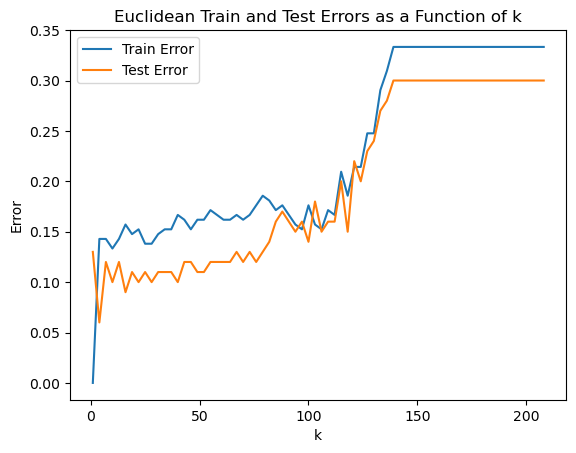

In [22]:
# Plot train and test errors in terms of k
plt.plot(euclidean_k_values, euclidean_train_errors, label='Train Error')
plt.plot(euclidean_k_values, euclidean_test_errors, label='Test Error')
plt.legend()
plt.title('Euclidean Train and Test Errors as a Function of k')
plt.xlabel('k')
plt.ylabel('Error')
plt.show()

In [23]:
# Which k∗ is the most suitable k among those values? (Take decisions by majority polling.)
optimal_euclidean_k = euclidean_k_values[np.argmin(euclidean_test_errors)]
print('Most suitable Euclidean k: ', optimal_euclidean_k)

Most suitable Euclidean k:  4


In [24]:
knn_classifier_model = KNeighborsClassifier(n_neighbors=optimal_euclidean_k, metric='euclidean')
knn_classifier_model.fit(train_X, train_y)
test_class_predictions = knn_classifier_model.predict(test_X)

In [25]:
# Calculate the confusion matrix, true positive rate, true negative rate, precision, and F1-score
cm = confusion_matrix(test_y, test_class_predictions)
print('Confusion matrix:\n', cm)

tn, fp, fn, tp = cm.ravel()

recall = recall_score(test_y, test_class_predictions) # tp / (tp + fn) = 69 / (69 + 1)
print('True positive rate: ', recall)

tnr = tn / (tn + fp) # tn / (tn + fp) = 25 / (25 + 5)
print('True negative rate: ', tnr)

precision = precision_score(test_y, test_class_predictions) # tp / (tp + fp) = 69 / (69 + 5)
print('Precision: ', precision)

f1 = f1_score(test_y, test_class_predictions) # 2 * (precision * recall) / (precision + recall) = 2 * (69 / (69 + 5) * 69 / (69 + 1)) / (69 / (69 + 5) + 69 / (69 + 1))
print('F1-score: ', f1)

Confusion matrix:
 [[25  5]
 [ 1 69]]
True positive rate:  0.9857142857142858
True negative rate:  0.8333333333333334
Precision:  0.9324324324324325
F1-score:  0.9583333333333333


#### iii. Learning Curve

In [26]:
# Plot the best test error rate, which is obtained by some value of k, against the size of training set, when the size of training set is N ∈ {10, 20, 30, . . . , 210}
train_sizes = list(range(10, 220, 10))

euclidean_test_errors = []

for N in train_sizes:
    # Select your training set by choosing the first [N/3] rows of Class 0 and the first N − [N/3] rows of Class 1
    class0_train_df = class0_df.iloc[:int(N / 3), :]
    class1_train_df = class1_df.iloc[:int(N - (N / 3)), :]

    # Form the training set by combining the training sets of both classes
    vertebral_train_df = pd.concat([class0_train_df, class1_train_df])

    # Select the rest of the data as the test set
    class0_test_df = class0_df.iloc[int(N / 3):, :]
    class1_test_df = class1_df.iloc[int(N - (N / 3)):, :]
    vertebral_test_df = pd.concat([class0_test_df, class1_test_df])

    # Prepare training and test data
    train_X = vertebral_train_df.iloc[:, :-1]
    train_y = vertebral_train_df.iloc[:, -1]
    test_X = vertebral_test_df.iloc[:, :-1]
    test_y = vertebral_test_df.iloc[:, -1]

    # Select the optimal k from a set starting from k = 1, increasing by 5 until N
    euclidean_k_values = list(range(1, N, 5))

    # Test all the data in the test database with k nearest neighbors
    errors_for_N = []

    for k in euclidean_k_values:
        # Create a KNN classifier with k neighbors and Euclidean metric
        knn_classifier_model = KNeighborsClassifier(n_neighbors=k, metric='euclidean')

        # Fit the classifier to the training data
        knn_classifier_model.fit(train_X, train_y)

        # Predict the class labels for the test data
        test_class_predictions = knn_classifier_model.predict(test_X)

        # Calculate the accuracy of the classifier on the test data
        test_accuracy = accuracy_score(test_y, test_class_predictions)

        # Append the test error to its respective list
        errors_for_N.append(1 - test_accuracy)

    euclidean_test_errors.append(min(errors_for_N))

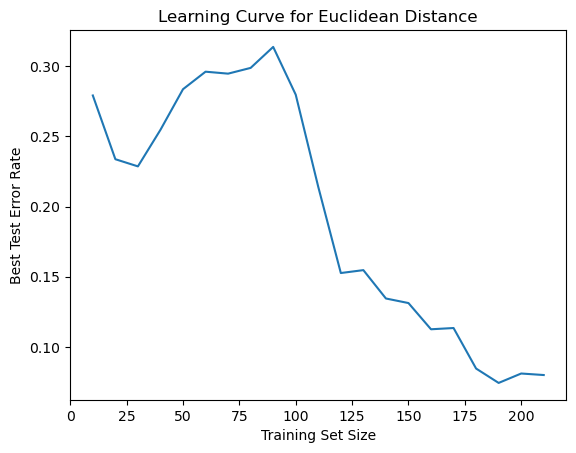

In [27]:
# Plot the best test error rate against the size of training set
plt.plot(train_sizes, euclidean_test_errors)
plt.title('Learning Curve for Euclidean Distance')
plt.xlabel('Training Set Size')
plt.ylabel('Best Test Error Rate')
plt.show()


### (d) Other Metrics

In [31]:
# Use all of your training data (training set N = 210)

class0_train_df = class0_df.iloc[:70, :]

# Select the first 140 rows of Class 1 as the training set 
class1_train_df = class1_df.iloc[:140, :]

# Form the training set by combining the training sets of both classes
vertebral_train_df = pd.concat([class0_train_df, class1_train_df])

# Select the rest of the data as the test set
class0_test_df = class0_df.iloc[70:, :]
class1_test_df = class1_df.iloc[140:, :]
vertebral_test_df = pd.concat([class0_test_df, class1_test_df])

# Verify shapes of training and test sets
print(vertebral_train_df.shape)
print(vertebral_test_df.shape)

(210, 7)
(100, 7)


In [32]:
# Prepare training and test data
train_X = vertebral_train_df.iloc[:, :-1]
train_y = vertebral_train_df.iloc[:, -1]
test_X = vertebral_test_df.iloc[:, :-1]
test_y = vertebral_test_df.iloc[:, -1]

print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(210, 6)
(210,)
(100, 6)
(100,)


In [28]:
# k ∈ {1, 6, 11, 16, . . . , 196}
k_values = list(range(1, 200, 5))

In [29]:
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(210, 6)
(210,)
(100, 6)
(100,)


In [75]:
def get_knn_test_errors(metric, weight):
    test_errors = []

    for k in k_values:
        # Create a KNN classifier with k neighbors, the specified metric, and the specified weight
        if metric == 'mahalanobis':
            # Must provide either V or VI for Mahalanobis distance
            # V is the covariance matrix of the training data, VI is the inverse covariance matrix of the training data
            # Per the assignment, we are "inverting the covariance matrix of the data" so we use VI
            knn_classifier_model = KNeighborsClassifier(n_neighbors=k, metric=metric, weights=weight,  metric_params={'VI': np.cov(train_X, rowvar=False)})
        else:
            knn_classifier_model = KNeighborsClassifier(n_neighbors=k, metric=metric, weights=weight)

        # Fit the classifier to the training data
        knn_classifier_model.fit(train_X, train_y)

        # Predict the class labels for the test data
        test_class_predictions = knn_classifier_model.predict(test_X)

        # Calculate the accuracy of the classifier on the test data
        test_accuracy = accuracy_score(test_y, test_class_predictions)

        # Append the test error to its list
        test_errors.append(1 - test_accuracy)

    return test_errors
        

#### i. Minkowski Distance.

##### A. Manhattan Distance with p = 1.

In [76]:
manhattan_test_errors = get_knn_test_errors('manhattan', 'uniform')

In [77]:
# Summarize the test errors (i.e., when k = k∗) in a table
manhattan_test_errors_df = pd.DataFrame({'k'            : k_values, 
                                         'Test Error'   : manhattan_test_errors})
manhattan_test_errors_df

,k,Test Error
0,1,0.11
1,6,0.11
2,11,0.11
3,16,0.12
4,21,0.12
5,26,0.11
6,31,0.12
7,36,0.13
8,41,0.13
9,46,0.13


In [92]:
# Select the best k when {1, 6, 11, . . . , 196}
manhattan_optimal_k_candidates = manhattan_test_errors_df[manhattan_test_errors_df['Test Error'] == min(manhattan_test_errors)].reset_index(drop=True)
manhattan_optimal_k_candidates

,k,Test Error
0,1,0.11
1,6,0.11
2,11,0.11
3,26,0.11


In [93]:
"""
Per question @44 on Piazza:
"With the same values of test errors, smaller values of k (like k=1) often lead to models with high variance and low bias, which can result in overfitting to the training data. On the other hand, larger values of k can lead to models with high bias and low variance, which might underfit the data. Choosing a moderate value of k gives a good balance between these extremes. In your case, k=6 might offer a good balance."
"""

manhattan_optimal_k = manhattan_optimal_k_candidates.iloc[1, 0] 
print('Best Manhattan k: ', manhattan_optimal_k)

Best Manhattan k:  6


##### B. With log10(p) in {0.1, 0.2, 0.3, ... ,1}.

##### C. Chebyshev Distance With p -> infinity.

In [80]:
chebyshev_test_errors = get_knn_test_errors('chebyshev', 'uniform')

In [81]:
# Summarize the test errors (i.e., when k = k∗) in a table
chebyshev_test_errors_df = pd.DataFrame({'k'            : k_values, 
                                         'Test Error'   : chebyshev_test_errors})
chebyshev_test_errors_df

,k,Test Error
0,1,0.13
1,6,0.10
2,11,0.12
3,16,0.08
4,21,0.11
5,26,0.12
6,31,0.12
7,36,0.10
8,41,0.13
9,46,0.12


In [94]:
# Select the best k when {1, 6, 11, . . . , 196}
chebyshev_optimal_k_candidates = chebyshev_test_errors_df[chebyshev_test_errors_df['Test Error'] == min(chebyshev_test_errors)].reset_index(drop=True)
chebyshev_optimal_k_candidates

,k,Test Error
0,16,0.08


In [95]:
# Only one optimal k, so select it
chebysev_optimal_k = chebyshev_optimal_k_candidates.iloc[0, 0]
print('Best Chebyshev k: ', chebysev_optimal_k)

Best Chebyshev k:  16


#### ii. Mahalanobis Distance.

In [84]:
mahalanobis_test_errors = get_knn_test_errors('mahalanobis', 'uniform')

In [85]:
# Summarize the test errors (i.e., when k = k∗) in a table
mahalanobis_test_errors_df = pd.DataFrame({'k'            : k_values, 
                                           'Test Error'   : mahalanobis_test_errors})
mahalanobis_test_errors_df

,k,Test Error
0,1,0.12
1,6,0.08
2,11,0.09
3,16,0.08
4,21,0.10
5,26,0.09
6,31,0.12
7,36,0.10
8,41,0.13
9,46,0.11


In [96]:
# Select the best k when {1, 6, 11, . . . , 196}
mahalanobis_optimal_k_candidates = mahalanobis_test_errors_df[mahalanobis_test_errors_df['Test Error'] == min(mahalanobis_test_errors)].reset_index(drop=True)
mahalanobis_optimal_k_candidates

,k,Test Error
0,6,0.08
1,16,0.08
2,116,0.08


In [98]:
"""
Per question @44 on Piazza:
"With the same values of test errors, smaller values of k (like k=1) often lead to models with high variance and low bias, which can result in overfitting to the training data. On the other hand, larger values of k can lead to models with high bias and low variance, which might underfit the data. Choosing a moderate value of k gives a good balance between these extremes."
"""

mahalanobis_optimal_k = mahalanobis_optimal_k_candidates.iloc[1, 0]
print('Best Mahalanobis k: ', mahalanobis_optimal_k)

Best Mahalanobis k:  16


### (e) Weighted Decision

In [ ]:
# Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈ {1, 6, 11, 16, . . . , 196}

### (f) Training Error Rate